In [1]:
import pandas as pd
fishy = pd.read_csv("../data/Fish.csv")
fishy.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
fishy.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [3]:
fishy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fishy["Weight"].sort_values(ascending=True)

40        0.0
72        5.9
145       6.7
147       7.0
146       7.5
        ...  
125    1100.0
141    1250.0
143    1550.0
142    1600.0
144    1650.0
Name: Weight, Length: 159, dtype: float64

In [7]:
zero = fishy["Weight"] == 0.0
fishy[zero]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [13]:
#the problem seems to be in this particular roach row, so let's see the other roaches to find out what is abnormal. and i want to see what's the average roach weight, including the other parameters as well because of the other parameters will change the weight of a fish
# 
roach = fishy["Species"] == "Roach"
roaches = fishy[roach]
roaches

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


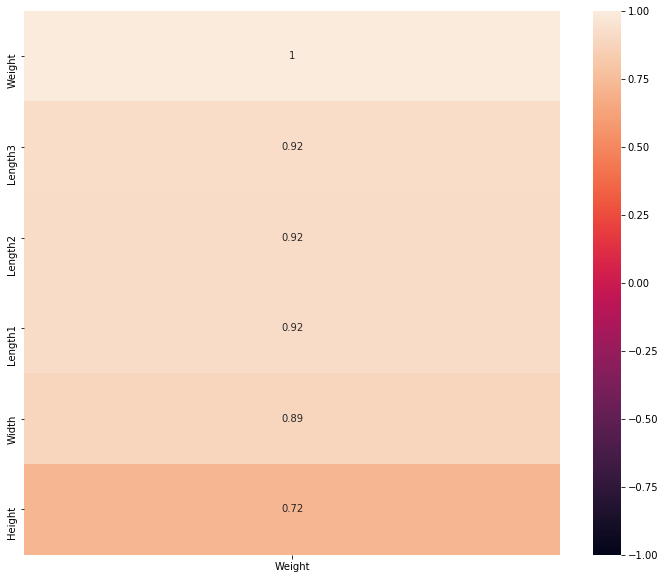

In [32]:
#i want to go a bit further and by linear regression, i want to predict the weight of that particular wrong roach data. but first let's see the correlation between them.
import matplotlib.pyplot as plt
import seaborn as sns
corr = fishy.corr()
corr_fig = plt.figure(figsize=(12,10))
corr_ax = corr_fig.add_subplot(1,1,1)
heatmap = sns.heatmap(corr[["Weight"]].sort_values(by="Weight",ascending=False),ax=corr_ax,vmin=-1,vmax=1,annot=True)

In [74]:
#seems like the correlation between parameters are pretty explanatory. continuing with building the linear regression model.
import numpy as np

y = np.array(not_zero["Weight"])
cols = fishy.columns.tolist()
cols = cols[2:]
print(cols)

not_zero = fishy[~zero]
x = not_zero[cols].values
print(x.shape)
y.shape


['Length1', 'Length2', 'Length3', 'Height', 'Width']
(158, 5)


(158,)

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pre = model.predict(x)
print(y_pre.shape)
y_pre

(158,)


array([ 328.19437418,  370.92535752,  371.80704821,  439.27979128,
        445.91261374,  466.55701976,  496.51707258,  474.96789072,
        513.03551355,  542.19901817,  537.47055125,  552.91396646,
        540.77135317,  557.29116193,  585.08565533,  608.17109057,
        609.07383561,  603.55919346,  646.09512808,  631.21036285,
        637.93365175,  672.26382612,  644.78249921,  652.5134714 ,
        670.59843076,  667.15911988,  689.30051109,  698.41394827,
        720.52604609,  795.2845538 ,  802.75633254,  806.54874722,
        867.08102054,  909.93645654,  894.36651988,  -86.63722142,
         36.12983099,   79.00733731,   94.02956217,  143.89017386,
        137.75317835,  134.39410291,  163.24827267,  199.21777551,
        184.0810313 ,  199.40576811,  212.73463448,  227.2864766 ,
        224.74578845,  252.47897585,  288.17642204,  333.74836526,
        347.09981498,  507.64960679,  302.52309561,  306.54066064,
        374.45977288,  541.59273977,  696.2604203 ,  799.51306

In [62]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
        110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,  169. ,
        161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,  270. ,
        306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,  120. ,
        150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,    5.9,
         32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,   85. ,
         85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,  130. ,
        135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,  225. ,
        145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,  265. ,
        250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,  685. ,
      

In [70]:
print(y.shape)
x[0:1].shape

(158,)


(1, 6)

In [77]:
model.predict(zeroach)

array([150.0792716])

In [89]:
roaches[roaches["Weight"] != 0.0].describe() 

,Weight,Length1,Length2,Length3,Height,Width
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,160.052632,20.731579,22.368421,25.084211,6.706353,3.673968
std,83.528088,3.532398,3.727384,4.108699,1.294663,0.705412
min,40.000000,12.900000,14.100000,16.200000,4.147200,2.268000
25%,115.000000,18.850000,20.400000,22.650000,5.959550,3.309650
50%,150.000000,20.500000,22.500000,25.000000,6.550000,3.631200
75%,174.500000,22.050000,23.750000,27.000000,7.241700,3.870600
max,390.000000,29.500000,31.700000,35.000000,9.485000,5.355000


In [81]:
# as we can see, our predicted value of weight is more or less the same. i can say it's not worth such an effort to fix this mistake in the dataset because we didn't recieve meaningful response from what we did. for this situation, it could be more optimal if we've considered replacing that 0 with the average of roaches. i knew it from the beginning but still wanted to practice this way and that's why i didn't use train/test approach.

In [97]:
fishy["Weight"].replace(0.0,150,inplace=True)
fishy.iloc[40,1]

150.0

In [109]:
cols = fishy.columns.tolist()
cols

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [114]:
# we fixed this, let's move on to classifying the fish types, let's try DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#remembering when we first assigned our parameters to x and y, we excluded weight column in x and excluded the problematic row with 0 weight. now we need to reassign these values as arrays.
cols = fishy.columns.tolist()
cols = cols[1:]
x = fishy[cols].values
y = np.array(fishy["Species"])
print(x.shape)
print(y.shape)

dtc_model = DecisionTreeClassifier(random_state=28)
dtc_model.fit(x,y)
y_pre = dtc_model.predict(x)

acc_val = accuracy_score(y,y_pre)
print("{:.0f}".format(acc_val*100))

(159, 6)
(159,)
100


In [116]:
dtc_model.get_depth()

13

In [117]:
dtc_model.feature_importances_

array([0.01425667, 0.13490823, 0.11596368, 0.07844972, 0.49736527,
       0.15905643])

In [121]:
from sklearn.metrics import classification_report
report = classification_report(y,y_pre)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        35
      Parkki       1.00      1.00      1.00        11
       Perch       1.00      1.00      1.00        56
        Pike       1.00      1.00      1.00        17
       Roach       1.00      1.00      1.00        20
       Smelt       1.00      1.00      1.00        14
   Whitefish       1.00      1.00      1.00         6

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

